In [4]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

import sys
sys.path.append('scripts')

import localization
import separation
from preprocessing import preprocess_disease

In [5]:
ppi_file = 'data/ppi.csv'
dga_file = "data/disease_gene.tsv"

dga, ppi = preprocess_disease(ppi_file, dga_file)

In [9]:
dmt = dga[dga.diseaseName == 'dementia']

In [10]:
dmt

,geneSymbol,diseaseName
35403,APP,dementia
35404,COL4A1,dementia
35405,CP,dementia
35406,CSF1R,dementia
35407,CST3,dementia
35408,DNMT1,dementia
35409,FUS,dementia
35410,GRN,dementia
35411,MAPT,dementia
35412,NOTCH3,dementia


In [11]:
dmt_genes = list(dmt.geneSymbol.unique())

In [12]:
len(dmt_genes)

17

In [13]:
gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [14]:
# Find dementia genes in ppi
dmt_genes_in_ppi = list()

# Extract the disease module for Dementia
for n in list(gppi.nodes):
    if n in dmt_genes:
        dmt_genes_in_ppi.append(n)

In [15]:
dmt_genes_in_ppi

['GRN',
 'HTRA1',
 'DNMT1',
 'APP',
 'PSEN2',
 'SLC6A3',
 'CSF1R',
 'PRNP',
 'FUS',
 'COL4A1',
 'MAPT',
 'NOTCH3',
 'CP',
 'CST3',
 'TYROBP',
 'SLC9A8',
 'TREM2']

In [16]:
# Extract the subgraph (disease module) for Dementia
dmt_module = gppi.subgraph(dmt_genes_in_ppi).copy()

In [17]:
# Calculate the number of nodes (genes) in the Dementia disease module
num_nodes = dmt_module.number_of_nodes()
print("Number of nodes (genes) in the Dementia disease module:", num_nodes)

# Calculate the number of edges (interactions) in the Dementia disease module
num_edges = dmt_module.number_of_edges()
print("Number of edges (interactions) in the Dementia disease module:", num_edges)

Number of nodes (genes) in the Dementia disease module: 17
Number of edges (interactions) in the Dementia disease module: 7


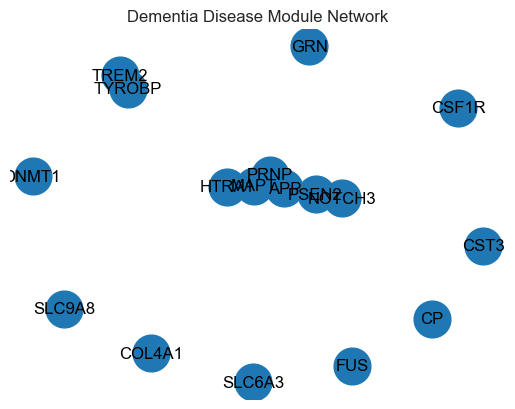

In [18]:
pos = nx.spring_layout(dmt_module)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(dmt_module, pos, node_size=700)

# Edges
nx.draw_networkx_edges(dmt_module, pos, width=1.0, alpha=0.5)

# Labels
nx.draw_networkx_labels(dmt_module, pos, font_size=12)

plt.title('Dementia Disease Module Network')
plt.axis('off')
plt.show()

In [22]:
# Use the localization module for LCC and random comparison
lcc = localization.get_lcc(gppi, dmt_genes_in_ppi)
sig_dict = localization.get_random_comparison(gppi, dmt_genes_in_ppi, 1000)

In [23]:
random_lcc = sig_dict['LCC_list']

print('Mean: ',sig_dict['mean'])

print('Std: ',sig_dict['std'])

print('z-score: ',sig_dict['z_score'])

print('p-value: ',sig_dict['p_value'])

Mean:  1.252
Std:  0.5200922995007713
z-score:  9.129148815618946
p-value:  0.0


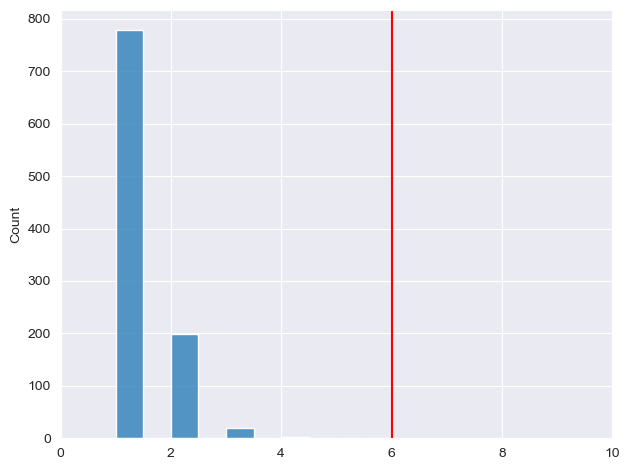

In [24]:
sns.histplot(data=random_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [27]:
sig_dp_dict = localization.get_random_comparison(gppi, dmt_genes_in_ppi, 1000, degree_preserving=True)

In [28]:
random_dp_lcc = sig_dp_dict['LCC_list']

print('Mean: ',sig_dp_dict['mean'])

print('Std: ',sig_dp_dict['std'])

print('z-score: ',sig_dp_dict['z_score'])

print('p-value: ',sig_dp_dict['p_value'])

Mean:  2.152
Std:  0.8619141488570657
z-score:  4.464481764341158
p-value:  8.026278391914943e-06


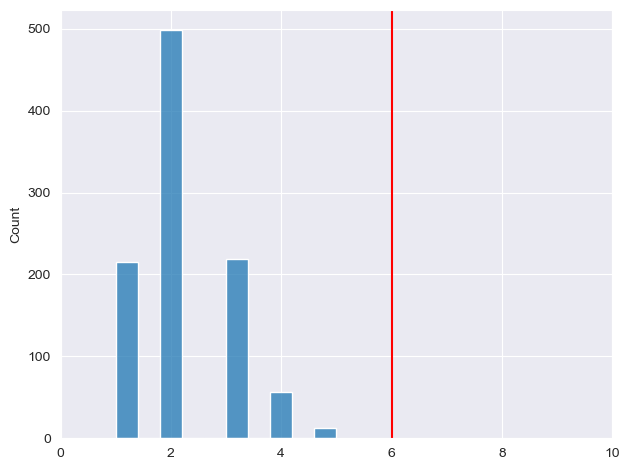

In [29]:
sns.histplot(data=random_dp_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(0, 10)
plt.tight_layout()
plt.show()